## **Hands-on 15**

### **Goal**:
You are the data scientist assigned to perform the data pre-processing and preparing the data for Machine Learning algorithms.

1. perform data exploration to understand the data (2.5 points)
2. prepare the test and training sets. (2.5 points)
3. pre-processing of the data, including fixing all the missing values (set the missing values to median values) and any other ones that you think are appropriate to perform. Build a pipeline to perform data transformation. (5 points)

In the next hands-on, we will use 14 out of 15 attributes as pedictors describe below to predict if income goes above or below \$50K/yr based on census data. `Income` will be the label.

### Data:
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

### Fields:
The dataset contains 15 columns

#### Target field: Income
- The income is divide into two classes: 50K

#### Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information

- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- `salary`: >50K,<=50K

Note: "?" is used to represent missing data in this dataset.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
adults = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/adult.csv'
df = pd.read_csv(adults, na_values=['?'])

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Hands-on 15 Part 1: Data Exploration (2.5 points)

In [ ]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


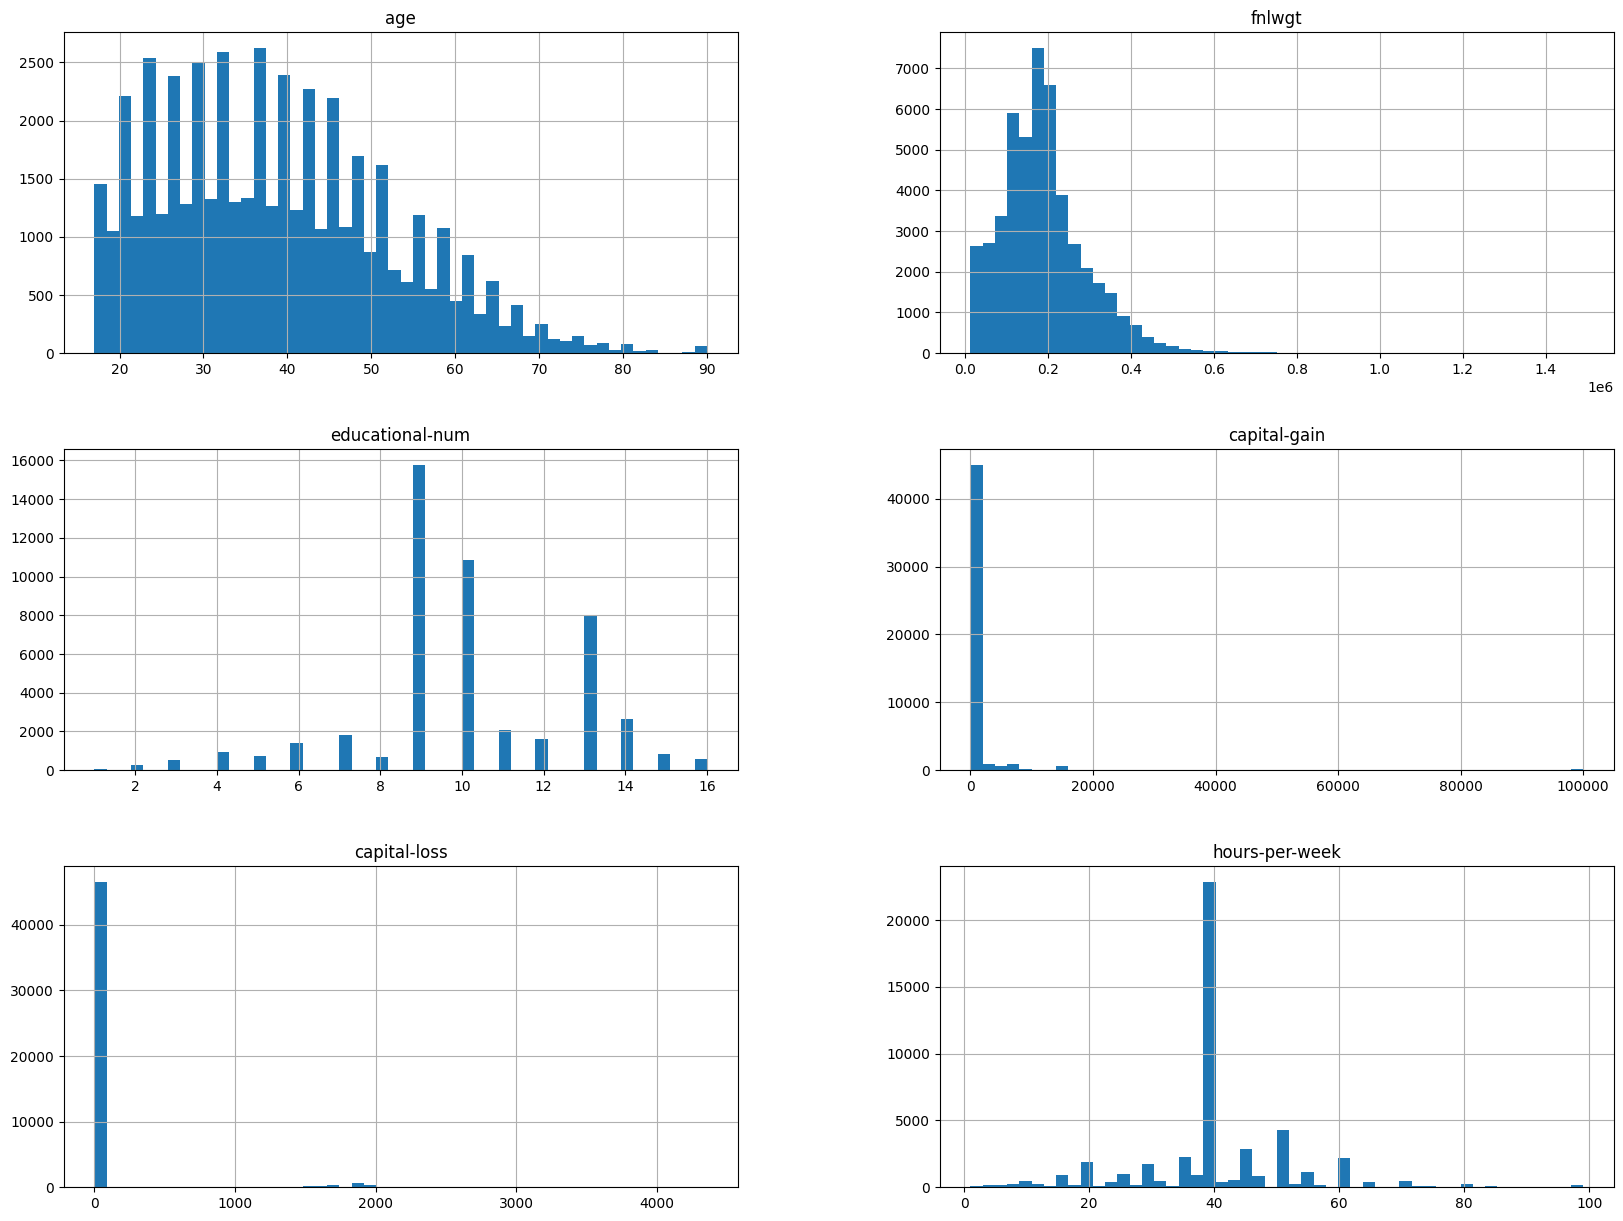

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

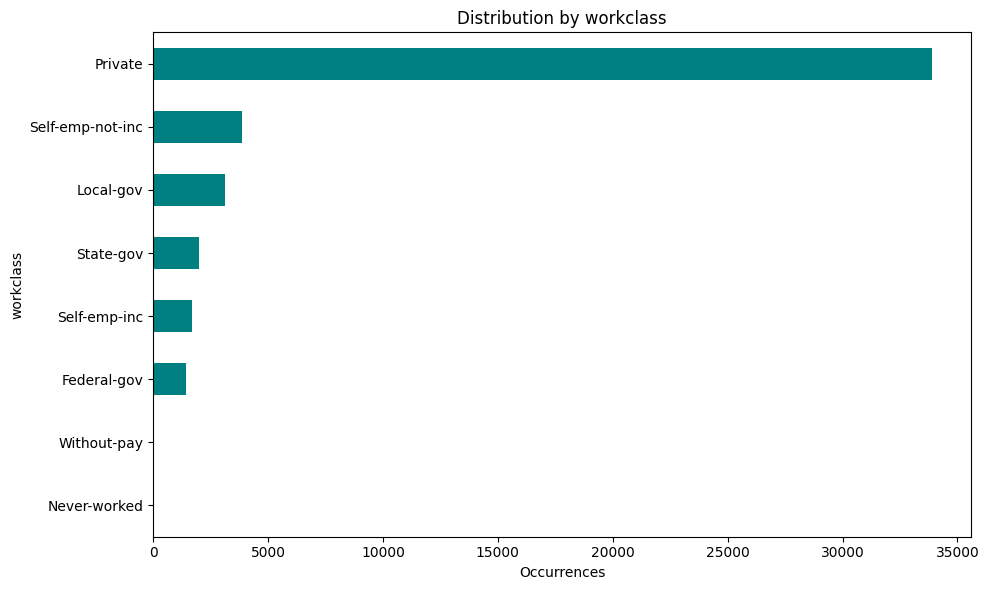

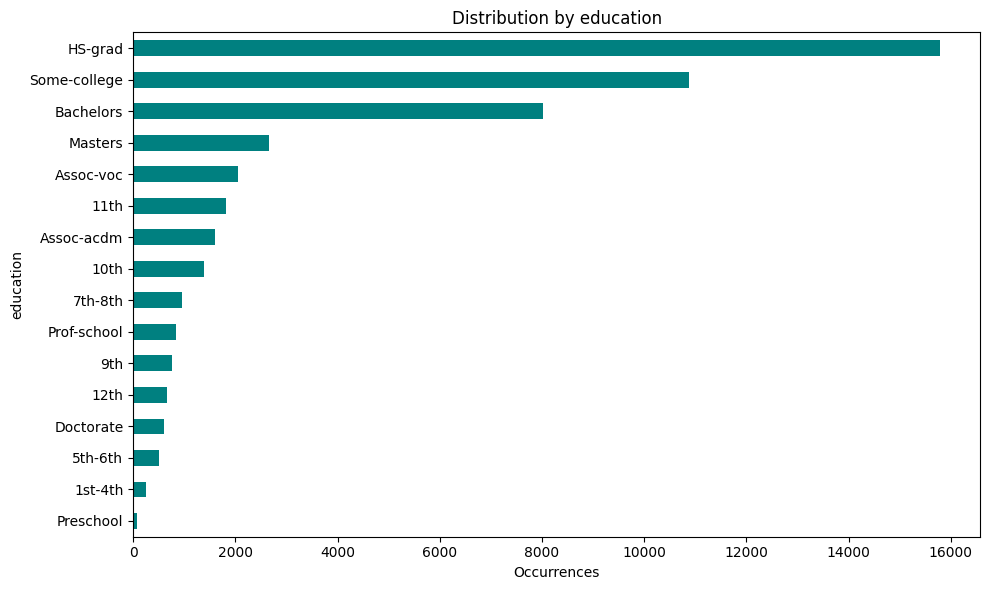

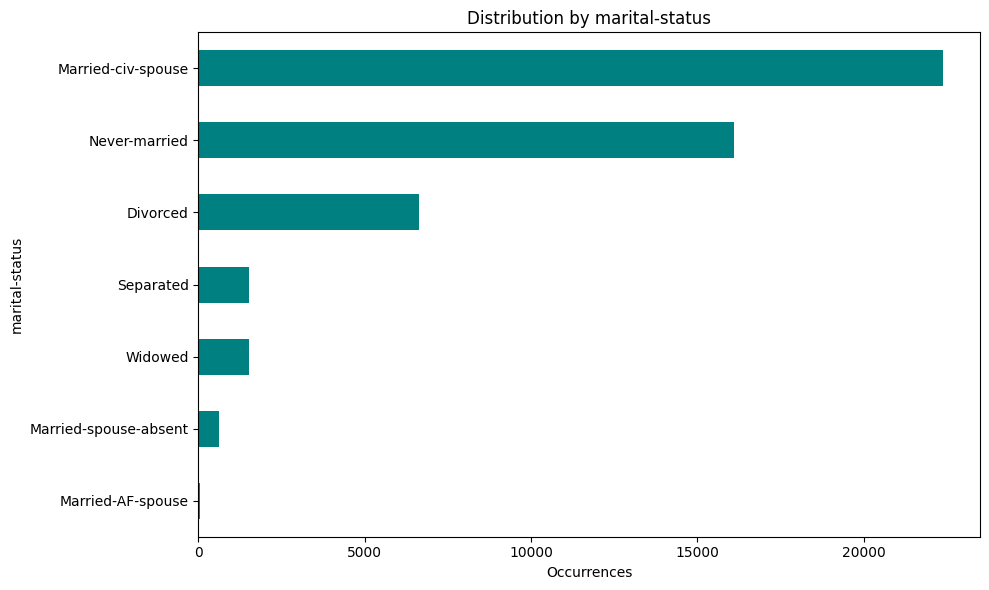

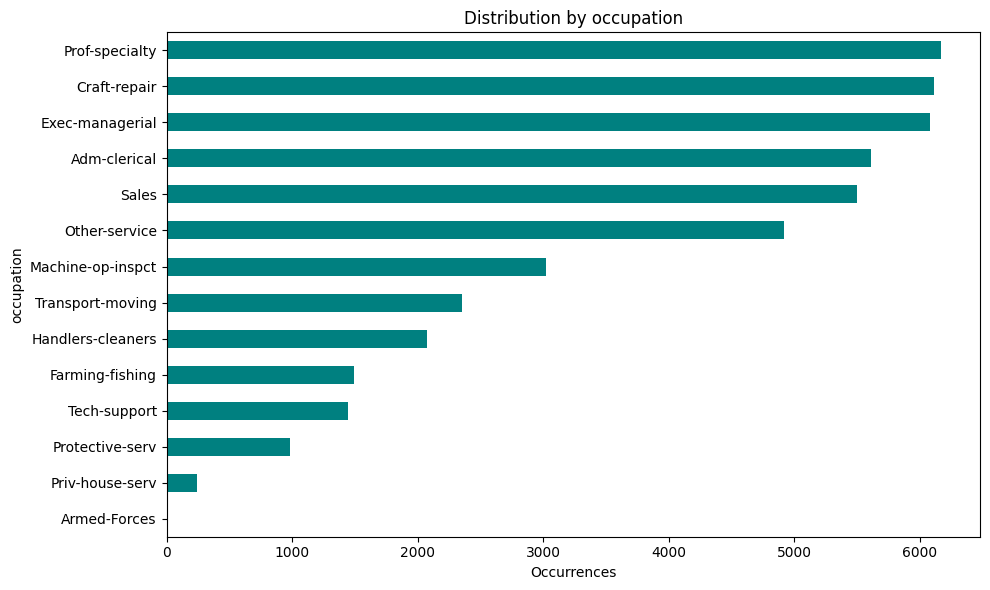

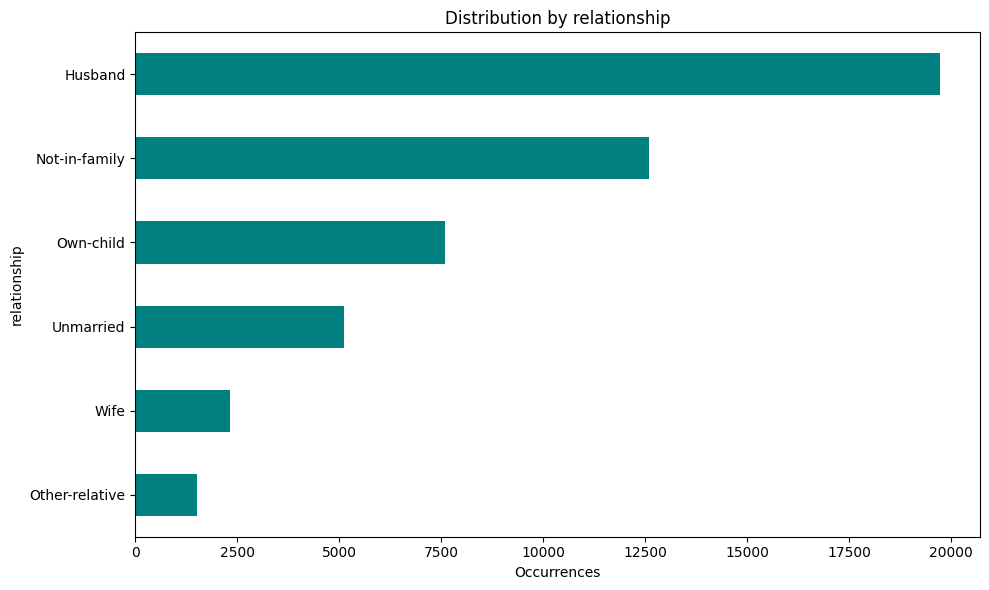

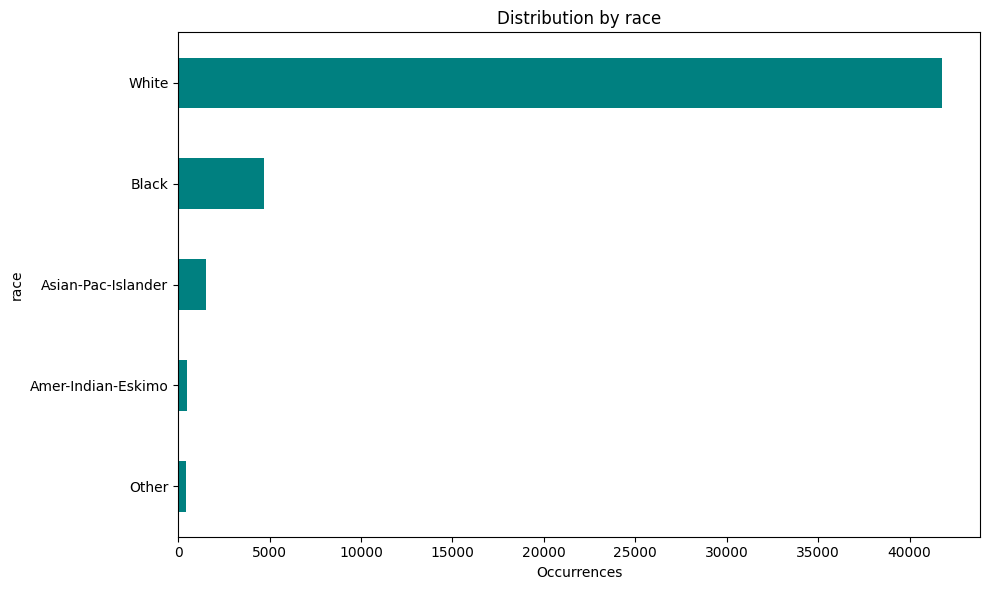

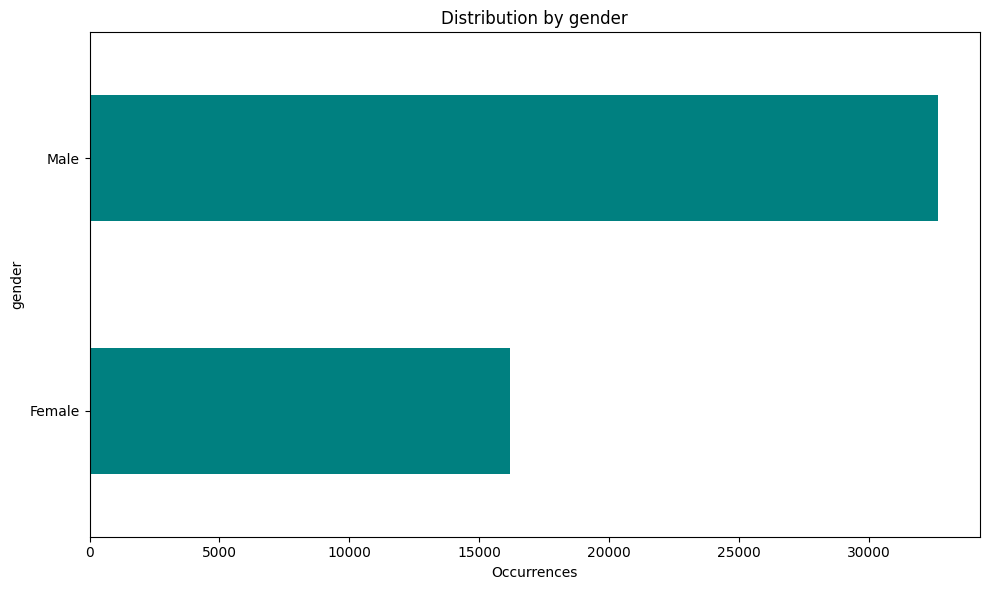

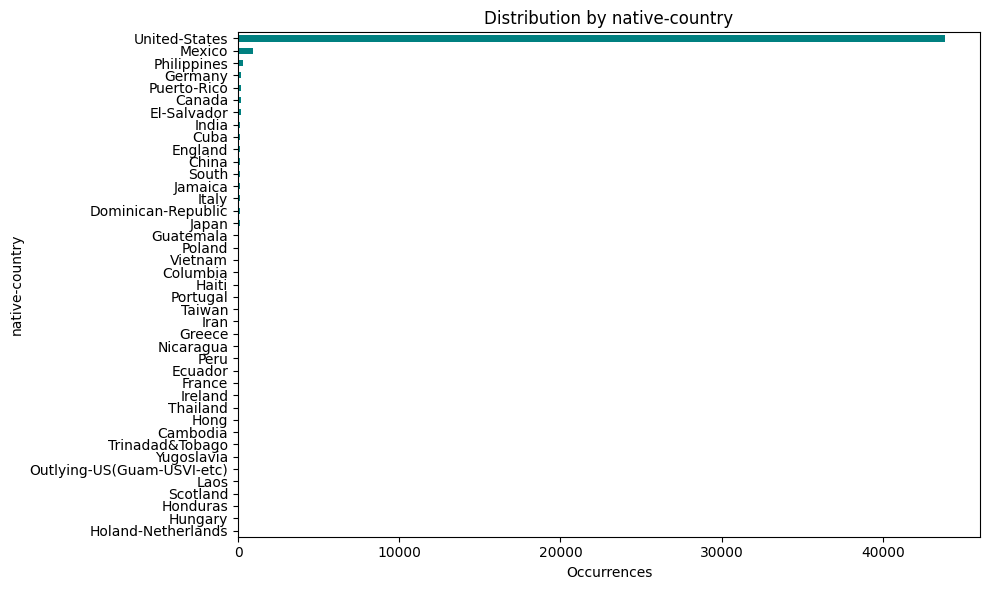

In [ ]:
for column in df_cat.columns:
  if column != 'income':
    category = df_cat[column].value_counts().dropna().sort_values(ascending=True)

    plt.figure(figsize=(10, 6))
    category.plot(kind='barh', color='teal')
    plt.title(f"Distribution by {column}")
    plt.xlabel("Occurrences")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

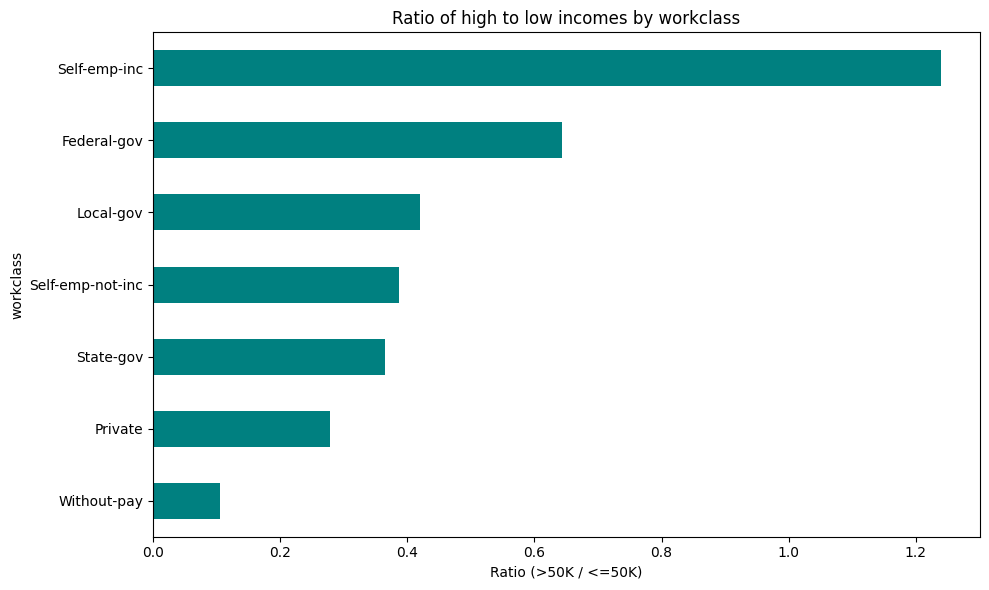

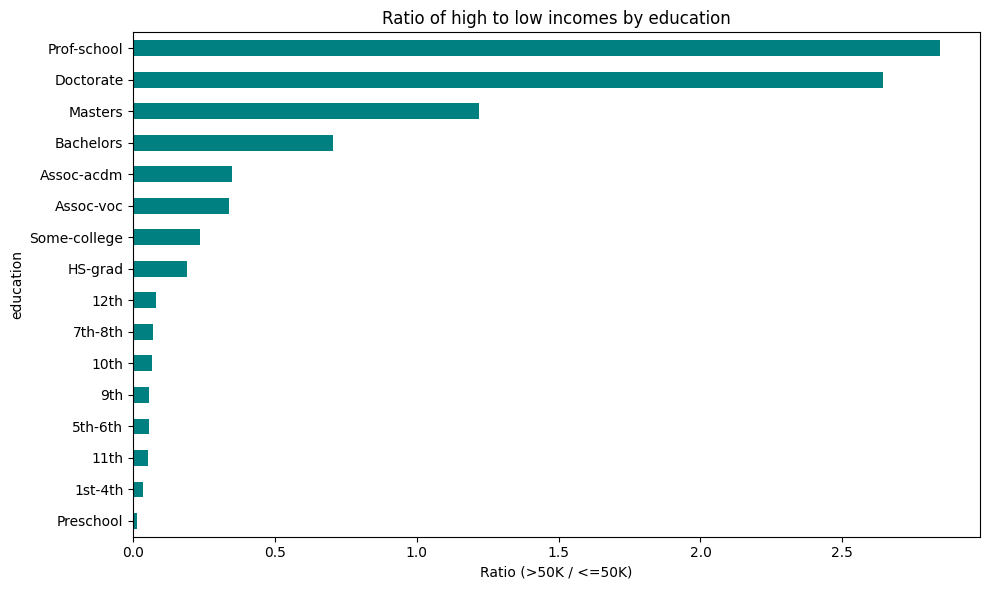

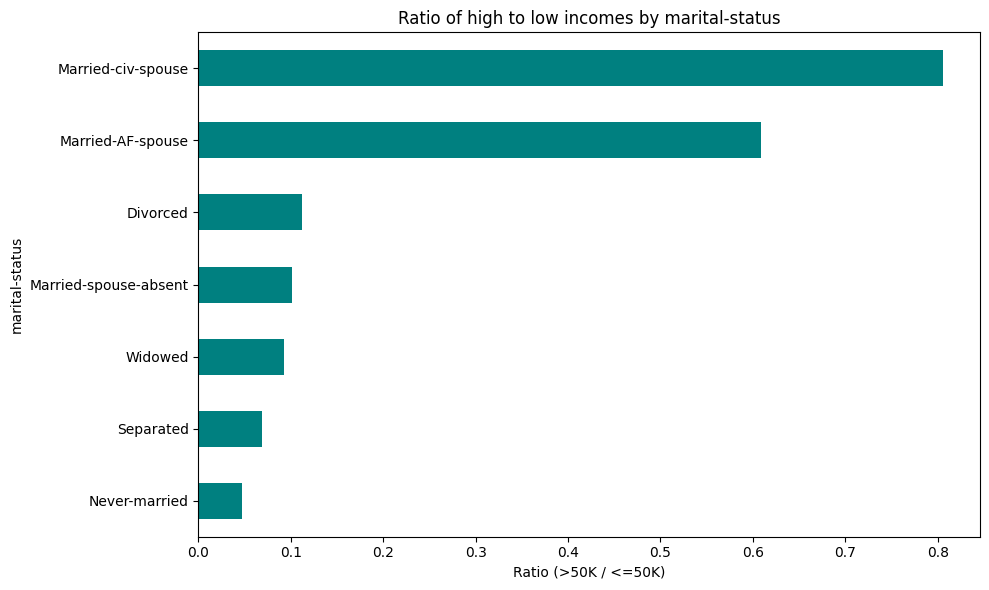

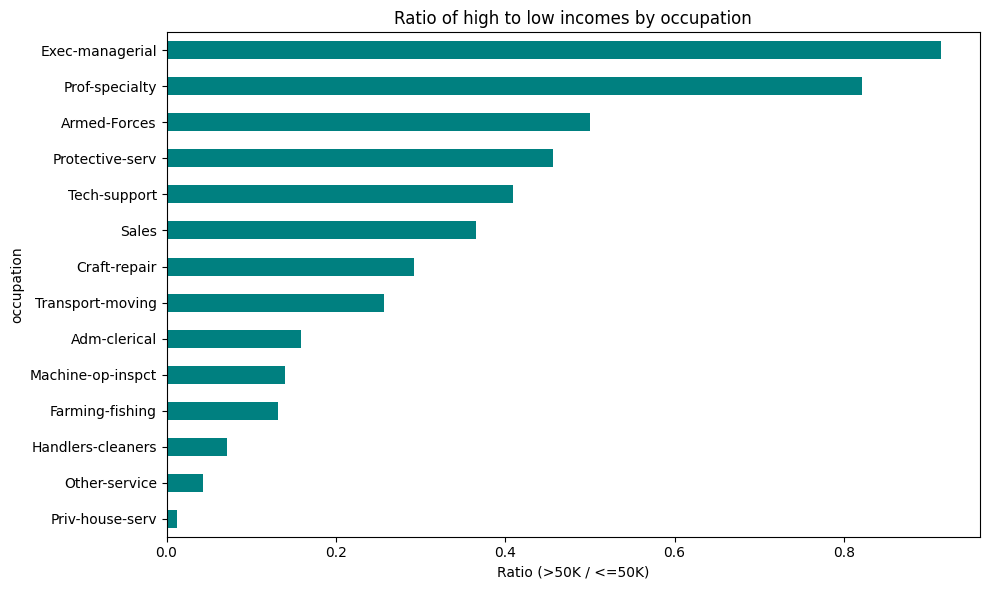

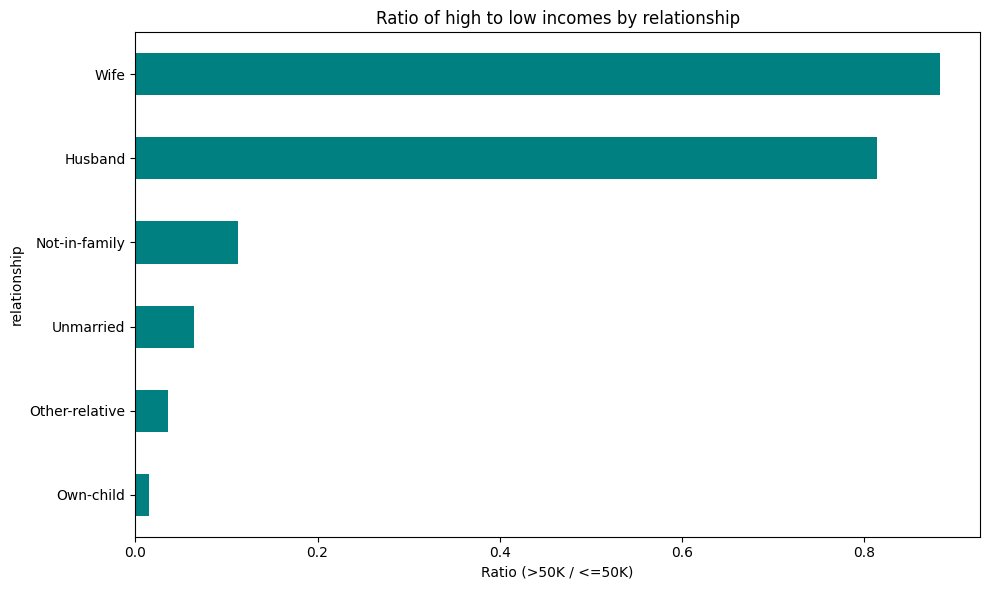

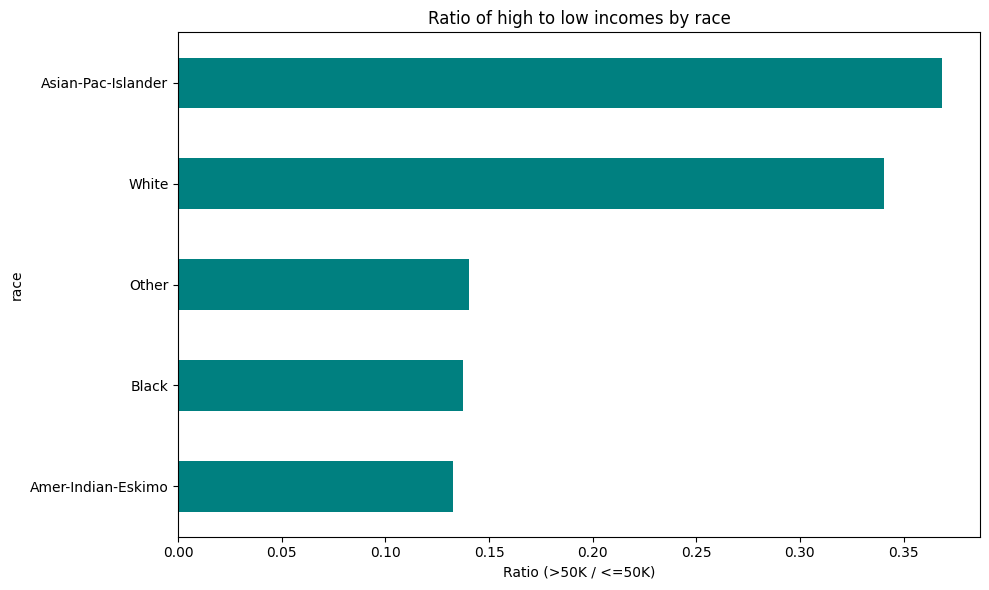

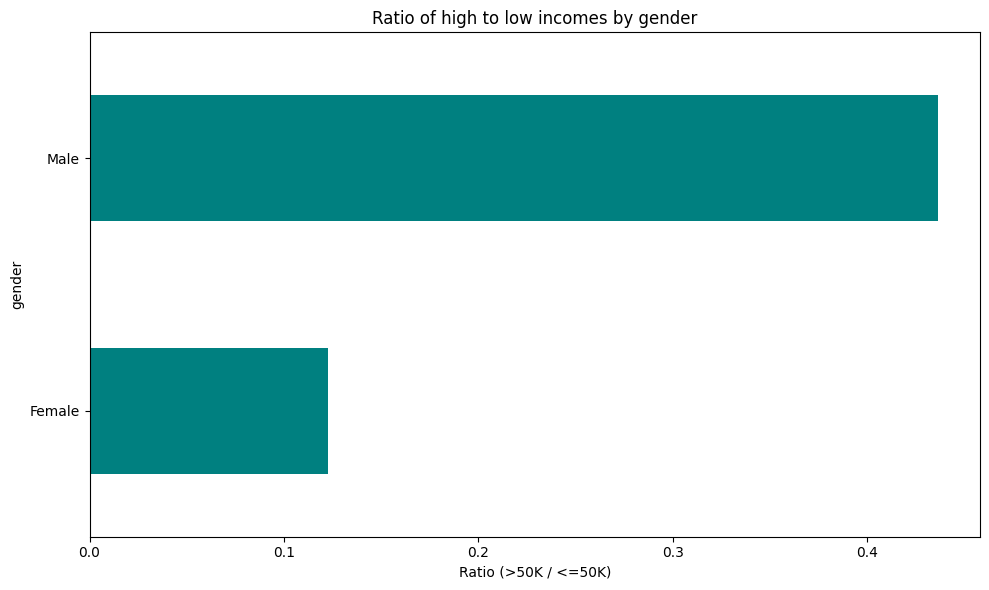

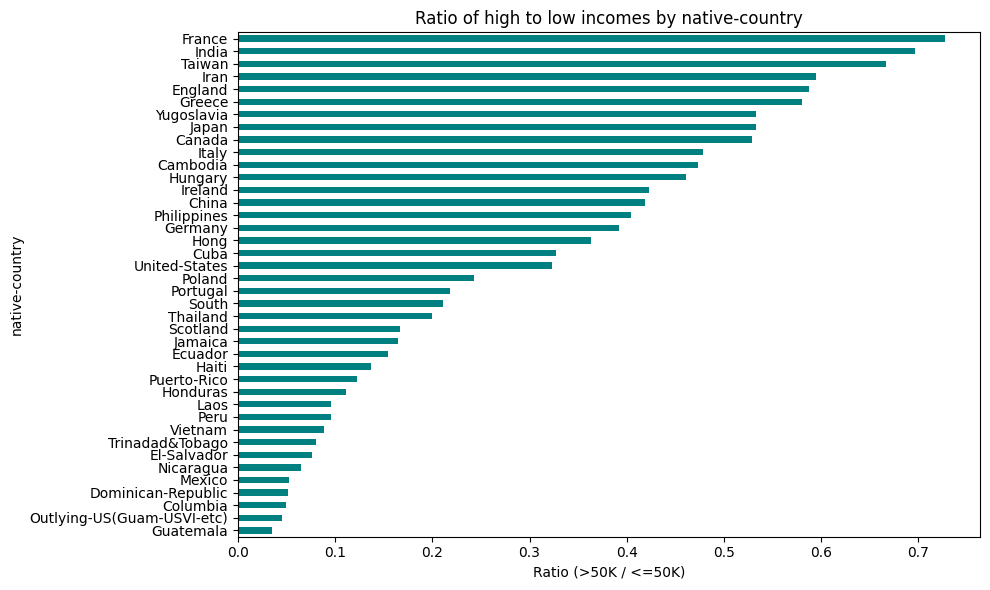

In [ ]:
for column in df_cat.columns:
  if column != 'income':
    groups = df_cat.groupby(column)['income'].value_counts().unstack()
    ratios = groups['>50K'] / groups['<=50K']
    ratios_sorted = ratios.sort_values(ascending=True).dropna()

    plt.figure(figsize=(10, 6))
    ratios_sorted.plot(kind='barh', color='teal')
    plt.title(f"Ratio of high to low incomes by {column}")
    plt.xlabel("Ratio (>50K / <=50K)")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

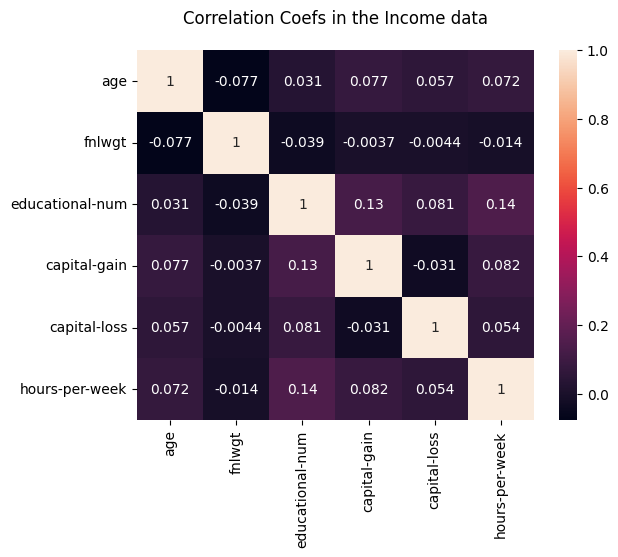

In [ ]:
corr_matrix = df_num.corr()
ax=sns.heatmap(corr_matrix, annot=True)
ax.set_title("Correlation Coefs in the Income data", y=1.05);

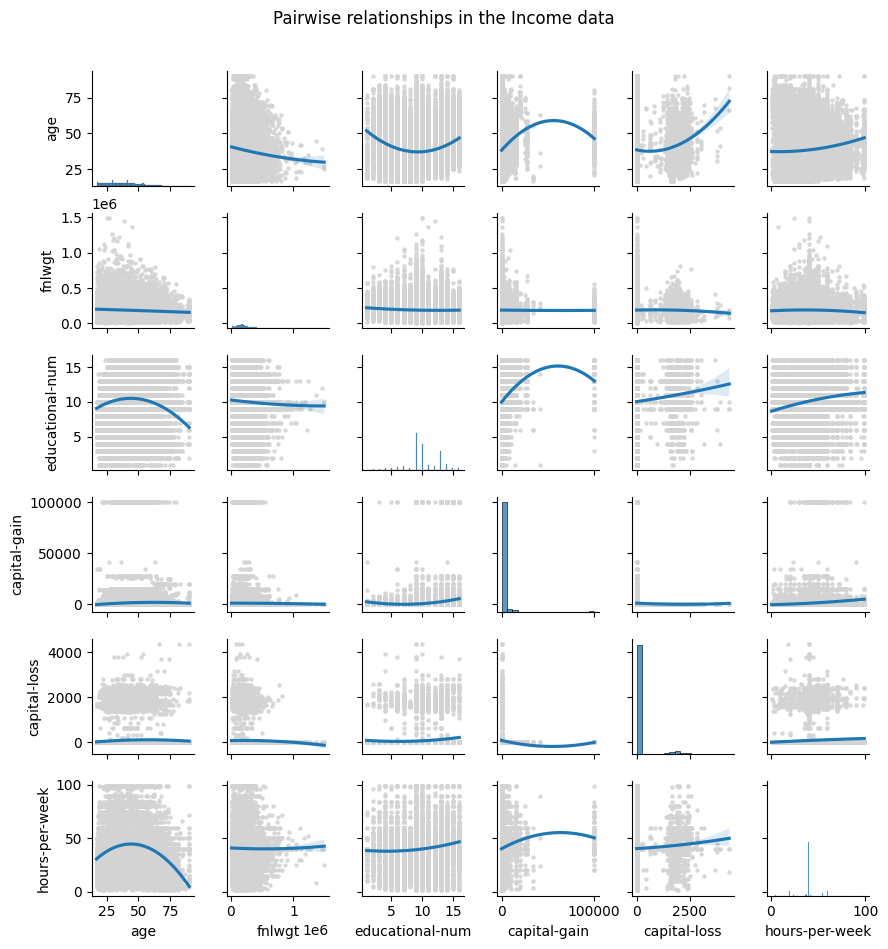

In [ ]:
g=sns.pairplot(
    data=df_num,
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=1.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships in the Income data", y=1.05
);

## Hands-on 15 Part 2: Prepare Training & Testing data sets (2.5 points)

In [ ]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

train_set_str, test_set_str = train_test_split(df, test_size=0.2, random_state=1, stratify=df['income'])

print(df.income.value_counts()[1]/df.income.value_counts()[0])
print(train_set_str.income.value_counts()[1]/train_set_str.income.value_counts()[0])
print(test_set_str.income.value_counts()[1]/test_set_str.income.value_counts()[0])

0.3295113776680191
0.32949909962882656
0.32956048801999116


In [ ]:
train = train_set_str.drop("income", axis=1)
train_lbs = train_set_str["income"].copy()

test = test_set_str.drop("income", axis=1)
test_lbs = test_set_str["income"].copy()

## Hands-on 15 Part 3: Pre-processing data (5 points)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, df_num.columns),
        ("cat", OneHotEncoder(handle_unknown='ignore'), df_cat.drop('income', axis=1).columns),
    ])

prepared_train = full_pipeline.fit_transform(train)

cat_features = full_pipeline.named_transformers_['cat'].get_feature_names_out(input_features=df_cat.drop('income', axis=1).columns)
all_features = list(df_num.columns) + list(cat_features)
prepared_train_df = pd.DataFrame(prepared_train.toarray(), columns=all_features)
prepared_train_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,2.232068,0.907645,-1.222507,-0.146599,-0.218374,2.401076,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.100489,0.344637,1.127556,-0.146599,-0.218374,-0.080336,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.040130,-0.856963,1.127556,-0.146599,-0.218374,0.746801,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.944489,1.177357,-0.439152,-0.146599,-0.218374,-0.080336,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.944489,-1.514332,-0.439152,-0.146599,-0.218374,0.250519,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36172,-0.418830,-0.090647,-0.439152,-0.146599,-0.218374,0.581374,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36173,0.111350,-0.807835,1.127556,-0.146599,4.867145,-0.907473,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36174,1.474669,0.062601,-0.047475,-0.146599,-0.218374,0.333233,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36175,0.641529,-0.653950,2.302588,1.888521,-0.218374,0.746801,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## **Hands-on 16**
Use the results from Hands-on 15 for the following steps:

1. Select ML Models and perform 10-fold Cross Validation. (5 points)
2. Pick the best model from step 1 and perform fine-tuning. (2.5 points)
3. Test ML model with the test set. (2.5 points)
4. Bonus: Create a plot with ROC curves to compare the performance of the ML models that you have trained using different ML classifiers. (2 points)

## Hands-on 16 Part 1: Select ML Models, perform 10-fold Cross Validation (5 points)
Try four different ML models for classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(C=100, penalty='l2', max_iter=1000, solver='liblinear')
log_reg_scores = cross_val_score(log_reg, prepared_train, train_lbs, cv=10)

print(f"Logistic Regression Accuracy: {log_reg_scores.mean():.2f} (+/- {log_reg_scores.std() * 2:.2f})")

Logistic Regression Accuracy: 0.85 (+/- 0.01)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree_scores = cross_val_score(decision_tree, prepared_train, train_lbs, cv=10)
print(f"Decision Tree Accuracy: {decision_tree_scores.mean():.2f} (+/- {decision_tree_scores.std() * 2:.2f})")

Decision Tree Accuracy: 0.81 (+/- 0.01)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest_scores = cross_val_score(random_forest, prepared_train, train_lbs, cv=10)
print(f"Random Forest Accuracy: {random_forest_scores.mean():.2f} (+/- {random_forest_scores.std() * 2:.2f})")

Random Forest Accuracy: 0.85 (+/- 0.02)


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_scores = cross_val_score(svm_clf, prepared_train, train_lbs, cv=10)
print(f"Support Vector Machine Accuracy: {svm_scores.mean():.2f} (+/- {svm_scores.std() * 2:.2f})")

Support Vector Machine Accuracy: 0.85 (+/- 0.01)


## Hands-on 16 Part 2: Pick the best model from Part 1 and perform fine-tuning (2.5 points)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(prepared_train, train_lbs)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation score: 0.85


## Test ML model with the test set (2.5 points)
Use the fine-tuned model and evaluate its performance using the test set that you have created in Hands-on 15.

In [ ]:
final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(test)
final_predictions = final_model.predict(X_test_prepared)

print('Final accuracy: ', sum(test_lbs == final_predictions) / len(test_lbs))

Final accuracy:  0.8494195688225539


\## Bonus: Plot the ROC curve to compare the performace of the ML classifiers (1  point)

In [ ]:
log_reg.fit(prepared_train, train_lbs)
decision_tree.fit(prepared_train, train_lbs)
random_forest.fit(prepared_train, train_lbs)
# svm_clf.fit(prepared_train, train_lbs)

RandomForestClassifier()

In [ ]:
log_reg_scores = log_reg.predict_proba(X_test_prepared)[:, 1]
decision_tree_scores = decision_tree.predict_proba(X_test_prepared)[:, 1]
random_forest_scores = random_forest.predict_proba(X_test_prepared)[:, 1]
# svm_clf_scores = svm_clf.predict_proba(X_test_prepared)[:, 1]
# I am not plotting svm because I need to set svm_clf = SVC(probability=True)
# that takes unresanoble amount of time to perform 10 fold cross validation

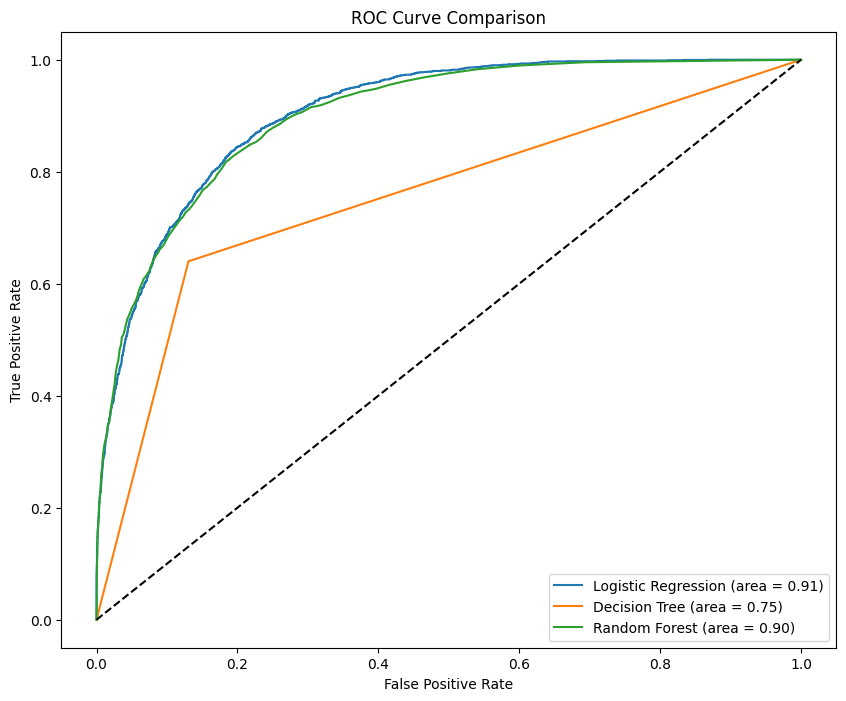

In [ ]:
from sklearn.metrics import roc_curve, auc

bin_lbs = np.where(test_lbs == '>50K', 1, 0)

fpr_log, tpr_log, _ = roc_curve(bin_lbs, log_reg_scores)
fpr_dt, tpr_dt, _ = roc_curve(bin_lbs, decision_tree_scores)
fpr_rf, tpr_rf, _ = roc_curve(bin_lbs, random_forest_scores)
# fpr_svm, tpr_svm, _ = roc_curve(bin_lbs, svm_clf_scores)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.2f)' % auc(fpr_log, tpr_log))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % auc(fpr_dt, tpr_dt))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % auc(fpr_rf, tpr_rf))
# plt.plot(fpr_log, tpr_log, label='SVM (area = %0.2f)' % auc(fpr_log, tpr_log))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

## Bonus: Evaluating the model using the Confusion Matrix and a Precision-Recall Curve (1 point)
A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics such as [accuracy, precision, recall, and F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html). Here is [an article](https://medium.com/swlh/explaining-accuracy-precision-recall-and-f1-score-f29d370caaa8) that gives a good explaination of Precision, Recall, and F1-score.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

prob_scores = final_model.predict_proba(X_test_prepared)[:, 1]

cm = confusion_matrix(test_lbs, final_predictions)

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(final_model, X_test_prepared, test_lbs, ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
# !pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__)
# wired. should work but it dosent

1.4.2


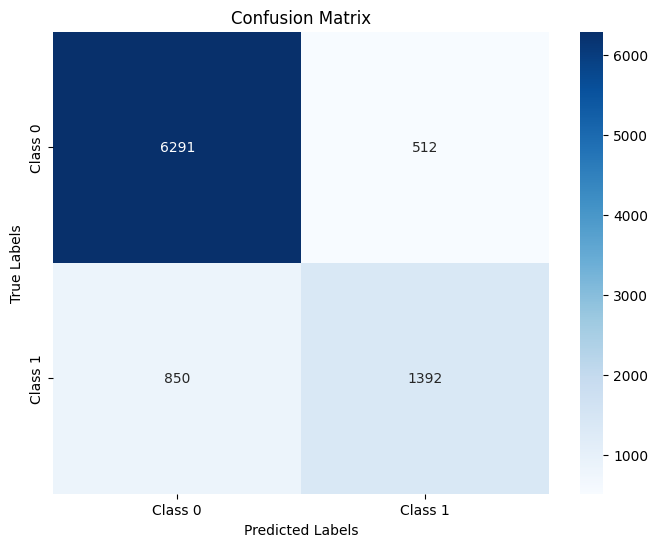

In [ ]:
cm = confusion_matrix(test_lbs, final_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Accuracy

Accuracy = $\frac{True\ Positives\ +\ True\ Negatives}{All\ Samples}$

### Precision (aka Specificity)

Precision = $\frac{True\ Positives}{True\ Positives\ +\ False\ Positives}$
= $\frac{True\ Positives}{Total\ Predicted\ Positives}$


### Recall (aka Sensitivity)

Recall = $\frac{True\ Positives}{True\ Positives\ +\ False\ Negatives}$
= $\frac{True\ Positives}{Total\ Actual\ Positives}$

### F1-score (combining Precision and Recall)

F1-score = $\frac{2\ ×\ (Precision\ ×\ Recall)}{Precision\ +\ Recall}$

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(test_lbs, final_predictions, average='binary', pos_label='>50K')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.73
Recall: 0.62
F1-Score: 0.67


## Precision-Recall Curve
[Precision-Recall Curve documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)


In [ ]:
from sklearn.metrics import precision_recall_curve, auc, plot_precision_recall_curve

precision, recall, thresholds = precision_recall_curve(test_lbs, prob_scores)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(recall, precision, label=f'Precision-Recall curve (area = {auc(recall, precision):.2f})')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend(loc='upper right')
plt.show()

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

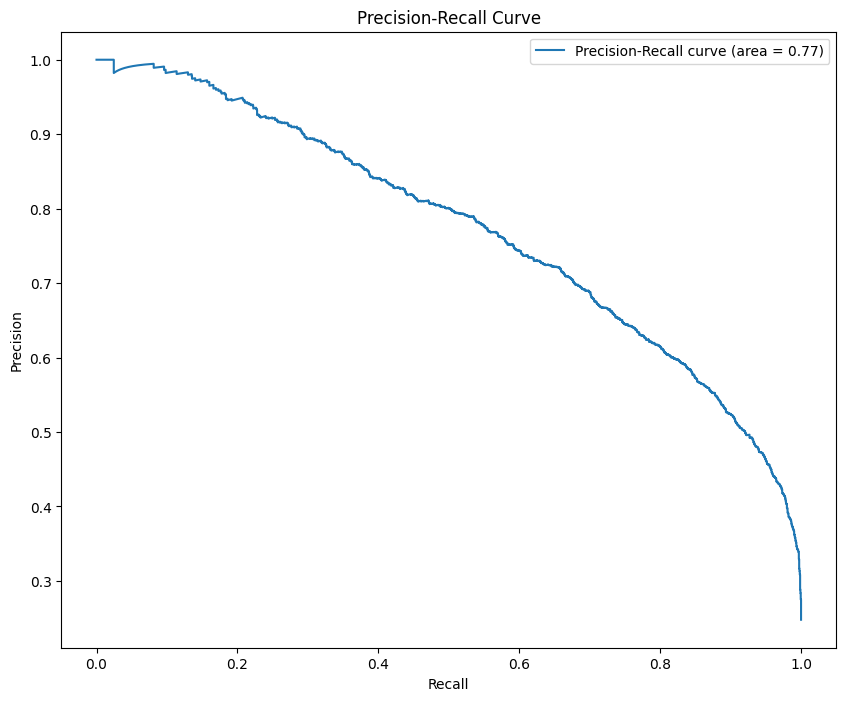

In [ ]:
# not sure why it did not work again
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

prob_scores = final_model.predict_proba(X_test_prepared)[:, 1]
precision, recall, thresholds = precision_recall_curve(bin_lbs, prob_scores)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(recall, precision, label=f'Precision-Recall curve (area = {auc(recall, precision):.2f})')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend(loc='upper right')
plt.show()